In [ ]:
#HW2
## Bar Ifrah 312425036
## Yaron Tal 205592652
## Rami skolozub 316736396

# Question #2 - Implement Latent Semantic Indexing (LSI)

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from os import error
import numpy as np
from matplotlib import pyplot as plt
from pandas.core.frame import DataFrame
import scipy
from scipy.sparse.linalg import svds
from scipy.spatial import KDTree

In [2]:
#Constants definition
DataPathQ3 = "two_circles_data.csv"
C = 0.5
NUMBER_OF_DIMENSIONS_Q3 = 3
K_MEANS_K = 2

In [6]:
#Arguments definition
class Args():

    def __init__(self, *args):
        super(Args, self).__init__(*args)
        self.data = ["Machine learning is super fun",
                     "Python is super, super cool",
                     "Statistics is cool, too",
                     "Data science is fun",
                     "Python is great for machine learning",
                     "I like football",
                     "Football is great to watch"]

In [7]:
#Define dataset class
class Dataset():
    def __init__(self, *args, **keywords):
        #Get the data strings
        self.data = args[0]
        #Get list of document numbers
        self.docs = list(range(len(self.data)))
        #Convert a collection of text documents list to a matrix of token counts per document
        vectorizer = CountVectorizer(min_df=1, stop_words='english')
        self.data = vectorizer.fit_transform(self.data)
        self.terms = vectorizer.get_feature_names()
        self.df = pd.DataFrame(self.data.toarray(), columns=self.terms
                               )
        print(self.df)

In [8]:
args = Args()
#Each row represents a document. Each column represents a word.
#Each entry equals the number of times the word appears in the document
dataset = Dataset(args.data)

   cool  data  football  fun  great  learning  like  machine  python  science  \
0     0     0         0    1      0         1     0        1       0        0   
1     1     0         0    0      0         0     0        0       1        0   
2     1     0         0    0      0         0     0        0       0        0   
3     0     1         0    1      0         0     0        0       0        1   
4     0     0         0    0      1         1     0        1       1        0   
5     0     0         1    0      0         0     1        0       0        0   
6     0     0         1    0      1         0     0        0       0        0   

   statistics  super  watch  
0           0      1      0  
1           0      2      0  
2           1      0      0  
3           0      0      0  
4           0      0      0  
5           0      0      0  
6           0      0      1  


In [9]:
#create latent senantic indexing class
class LatentSemanticIndexing():
    def __init__(self, df: DataFrame, k: int):
        self.df = df
        self.k = k
        # frequency matrix num of terms X num of docs
        self.A = scipy.sparse.coo_matrix.asfptype(df.values)
        #perform spectral decomposition SVD for matrix A
        self.U, self.Sigma, self.V_t = svds(self.A, k=self.k)
        #Get the sigma matrix with the eigenvalues on the diagonal
        self.SigmaI = self.Sigma*np.eye(self.k)
        #Get the k-dimentional composed form matrix --> the multiplication of U*Sigma_matriz*V in the reduced dimention of K
        #U = 7Xk ; Sigma_matrix = kXk ; V = kX13 where k=2
        self.composedForm = self.getComposedForm()

    def getComposedForm(self):
        try:
            k = self.k
            return self.U[:, 0:k]@self.SigmaI[0:k, 0:k]@self.V_t[0:k, :]
        except error:
            raise(error)

    def getTermsAndDocsVectors(self):
        k = self.k
        docsVectorsComposed = self.U[:, 0:k]@self.SigmaI[0:k, 0:k]
        termsVectorsComposed = self.SigmaI[0:k,
                                           0:k]@self.V_t[0:k, :]
        return docsVectorsComposed, termsVectorsComposed.transpose()

In [10]:
lsi = LatentSemanticIndexing(dataset.df, 2)

In [11]:
composedForm = lsi.composedForm
#print our U_sigma_V composed 7*13 matrix
print(composedForm)

[[ 0.26624574  0.08634929  0.19471214  0.43230189  0.50835711  0.70621165
   0.04661407  0.70621165  0.61478479  0.08634929  0.01171999  0.85500411
   0.14809807]
 [ 1.00823578 -0.00715167 -0.29510443  0.24737408 -0.22180036  0.23642702
  -0.09140281  0.23642702  0.79004371 -0.00715167  0.20009334  1.87081063
  -0.20370162]
 [ 0.25953708 -0.01887166 -0.12858701 -0.00715167 -0.16651742 -0.06339463
  -0.0371842  -0.06339463  0.12497872 -0.01887166  0.05944374  0.41190666
  -0.09140281]
 [-0.02602333  0.02959895  0.0985025   0.11594824  0.19471214  0.20850314
   0.02594421  0.20850314  0.11500218  0.02959895 -0.01887166  0.07204594
   0.07255828]
 [-0.09321335  0.12215386  0.40267567  0.4824129   0.80109633  0.86454536
   0.10586566  0.86454536  0.48618759  0.12215386 -0.07511462  0.32406157
   0.29681   ]
 [-0.12858701  0.02594421  0.11498181  0.07255828  0.18911901  0.15247974
   0.03172846  0.15247974  0.01446286  0.02594421 -0.0371842  -0.13619154
   0.08325334]
 [-0.29510443  0.07255

In [19]:
#get the documents and terms composed matrixes.
docsVectorsComposed, termsVectorsComposed = lsi.getTermsAndDocsVectors()
print("docs vectors: \n", docsVectorsComposed)
print("terms vectors: \n", termsVectorsComposed)

docs vectors: 
 [[-0.47650694 -1.57247271]
 [ 1.21491855 -2.01590517]
 [ 0.46663292 -0.31817376]
 [-0.297151   -0.29469888]
 [-1.21014931 -1.24575812]
 [-0.38114092 -0.03797199]
 [-0.99233284 -0.2405853 ]]
terms vectors: 
 [[ 0.78372206 -0.80842599]
 [-0.13849341 -0.1020712 ]
 [-0.64013603 -0.09648044]
 [-0.36057939 -0.64670908]
 [-1.02651265 -0.51480635]
 [-0.78610126 -0.97611568]
 [-0.17763866 -0.01315189]
 [-0.78610126 -0.97611568]
 [ 0.0022228  -1.12970189]
 [-0.13849341 -0.1020712 ]
 [ 0.21748399 -0.1102019 ]
 [ 0.91039018 -1.94108606]
 [-0.46249738 -0.08332855]]


In [16]:
#function that receives 2 words query (out of the words in the example), locates the query in the embedded space (as a red x) and
#returns the name of the closest documents
def plotDocsAndTermsGraph(docsVecs, termVecs, docsNames, termsNames, query_loc='NA',closest_doc_loc = 'NA', word1_loc = 'NA', word2_loc = 'NA'):
    #plot the documents
    plt.scatter(docsVecs[:, 0], docsVecs[:, 1], color='blue')
    # docs annotating
    for i in range(len(docsVecs)):

        label = f"d{docsNames[i]}"

        plt.annotate(label,  # this is the text
                     # this is the point to label
                     (docsVecs[i][0], docsVecs[i][1]),
                     textcoords="offset points",  # how to position the text
                     xytext=(0, 10),  # distance from text to points (x,y)
                     ha='center')
    #plot the terms in the same graph
    plt.scatter(termVecs[:, 0], termVecs[:, 1], color='green')
    #Anotate the terms
    for j in range(len(termVecs)):
        label = f"{termsNames[j]}"

        plt.annotate(label,  # this is the text
                     # this is the point to label
                     (termVecs[j][0], termVecs[j][1]),
                     textcoords="offset points",  # how to position the text
                     xytext=(0, 10),  # distance from text to points (x,y)
                     ha='center')
    if query_loc is not 'NA':
        label = 'query'
        plt.annotate("query",query_loc, textcoords="offset points",  # how to position the text
                     xytext=(0, 10),  # distance from text to points (x,y)
                     ha='center')
        plt.scatter(query_loc[0], query_loc[1], color='red')

        plt.annotate("", closest_doc_loc, textcoords="offset points",  # how to position the text
                     xytext=(0, 10),  # distance from text to points (x,y)
                     ha='center')
        plt.scatter(closest_doc_loc[0], closest_doc_loc[1], s = 250, facecolors='none', color='red',marker='o')
        plt.scatter(word1_loc[0], word1_loc[1], s=250, facecolors='none', color='red', marker='o')
        plt.scatter(word2_loc[0], word2_loc[1], s=250, facecolors='none', color='red', marker='o')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Geometrical plot")

    plt.show()

<>:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-16-ecad73243773>:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if query_loc is not 'NA':


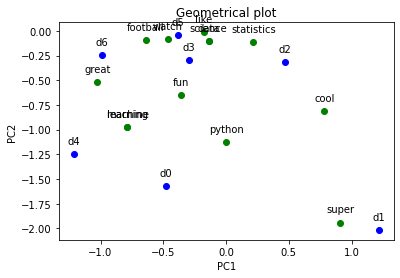

In [15]:
plotDocsAndTermsGraph(docsVectorsComposed,
                          termsVectorsComposed, dataset.docs, dataset.terms)

In [20]:
#function that receives 2 words query (out of the words in the example), locates the query in the embedded space (as a red x) and
#returns the name of the closest documents
def word_doc_query(word1, word2, word_component_df,docsVecs, termVecs, docsNames, termsNames):
    word1_loc = word_component_df[word1]
    word2_loc = word_component_df[word2]
    #query location is the average of 2 word cordinated for x & y direction
    query_loc = [(word1_loc[0] + word2_loc[0]) / 2, (word1_loc[1] + word2_loc[1]) / 2]
    """
        idx = (np.linalg.norm(docsVecs - query_loc)).argmin()
        d=[]
        for i in range docsVecs:
            d=cdist(docsVecs[i], query_loc, 'euclidean')
    """
    
    kdtree = KDTree(docsVecs)
    #find closest document to our query cordinated
    d, closest_doc = kdtree.query((query_loc))
    print("closest document location:", docsVecs[closest_doc],"\nclosest document number:", closest_doc)
    closest_doc_loc = docsVecs[closest_doc]

    #plot and mark the selected word. the query and the closest document.
    plotDocsAndTermsGraph(docsVecs, termVecs, docsNames, termsNames,query_loc, closest_doc_loc, word1_loc, word2_loc)

In [21]:
#Create DF for word component
word_component_df = pd.DataFrame(termsVectorsComposed.T, index=[
                                     "component_1", "component_2"], columns=lsi.df.columns)

In [22]:
word1 = input("Enter 1st word:")
word2 = input("Enter 2nd word:")
# word1 = 'cool'
# word2 = 'super'

Enter 1st word:cool
Enter 2nd word:super


closest document location: [ 1.21491855 -2.01590517] 
closest document number: 1


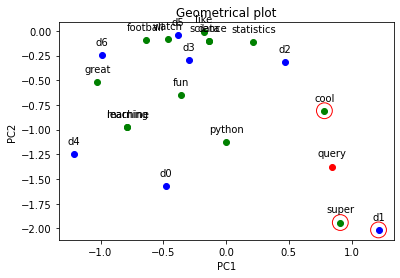

In [23]:
word_doc_query(word1, word2, word_component_df, docsVectorsComposed,termsVectorsComposed, dataset.docs, dataset.terms)

# Question #3 - Diffusion maps

In [36]:
#Imports
from scipy.sparse.linalg import svds
from scipy.spatial.distance import squareform, pdist
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [37]:
class DmDataset():
    def __init__(self, *args, **keywords):
        self.data = pd.read_csv(keywords["path"], names=['x', 'y']).values

In [38]:
#read the data to data frame
dataset = DmDataset(path=DataPathQ3)

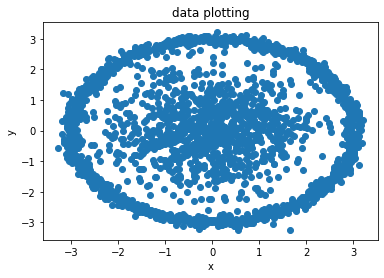

In [39]:
#plot a scatter plot of the data
plt.scatter(dataset.data[:, 0], dataset.data[:, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("data plotting")
plt.show()

In [40]:
#parameter C that will be used to multiply
#reduced desired dimension d
class DiffusionMaps():
    def __init__(self, dataset: np.array, C: float, d: int):
        self.dataset = dataset
        self.C = C
        self.d = d

In [41]:
dm = DiffusionMaps(dataset.data, C, NUMBER_OF_DIMENSIONS_Q3)

In [42]:
def myDM(dataset, C, d):
    NUMBER_OF_ROWS = len(dataset)
    NUMBER_OF_COLS = len(dataset[0])
    #create a square matrix of Euclidean distances between all data points
    dist = squareform(pdist(dataset))
    print('distance matrix: \n',dist)
    minDistInRow = 100000000*np.ones(NUMBER_OF_ROWS)
    #find minimum distance in each row
    for j in range(NUMBER_OF_ROWS):
        for i in range(NUMBER_OF_ROWS):
            if(i != j and dist[j, i] < minDistInRow[j]):
                minDistInRow[j] = dist[j, i]
    #Compute epsilon for the Gausian kernel using the max-min heuristic
    #take the maximum value within the minimum values of each row
    epsilon = max(minDistInRow)
    #compute W
    updatedDist = -(dist**2)/(C*epsilon)
    W = np.exp(updatedDist)
    D = np.zeros(NUMBER_OF_ROWS)
    for idx, row in enumerate(W):
        D[idx] = sum(row)
    InvertedD = D**-1
    P = W
    for i, row in enumerate(P):
        P[i] = P[i]*InvertedD[i]
    #Compute the spectral decomposition of P with SVD
    U, S, Vt = svds(P, k=d+1)
    #Sort the singular values and vectors by descending order
    sorted_index = np.argsort(S)[::-1]
    S = S[sorted_index]
    U = U[:, sorted_index]
    Vt = Vt[sorted_index, :]
    #Return the first d Diffusion maps coordinates by multiplying the the left singular vectors with their
    # associated singular values
    dm_values = np.zeros((NUMBER_OF_ROWS, d))
    for j in range(1, d+1):
        dm_values[:, j-1] = S[j]*U[:, j]
    #Take the feidler vector
    #fiedlerVector = S[-2]*U[:, -2]
    fiedlerVector = dm_values[:, 0]
    return dm_values, fiedlerVector

In [43]:
dmValues, fiedlerVector = myDM(dm.dataset, dm.C, dm.d)

distance matrix: 
 [[0.         1.00138476 0.91925783 ... 2.711064   2.66278883 2.60492175]
 [1.00138476 0.         1.77112483 ... 1.95689196 1.92046014 1.8763664 ]
 [0.91925783 1.77112483 0.         ... 3.02219329 2.96592367 2.89947122]
 ...
 [2.711064   1.95689196 3.02219329 ... 0.         0.05901281 0.12761839]
 [2.66278883 1.92046014 2.96592367 ... 0.05901281 0.         0.06865863]
 [2.60492175 1.8763664  2.89947122 ... 0.12761839 0.06865863 0.        ]]


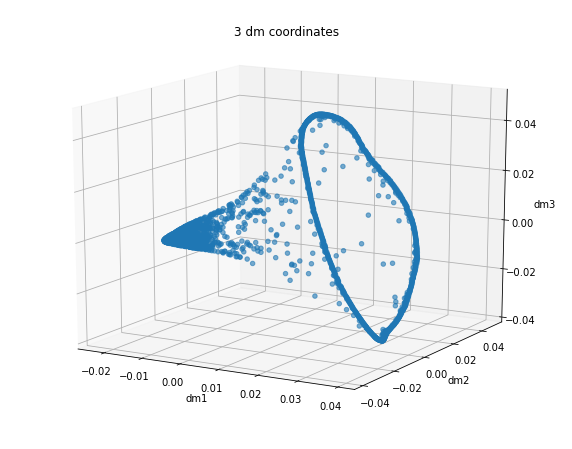

In [44]:
# plot 3 dm
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(15, -60)
scatter = ax.scatter(dmValues[:, 0], dmValues[:, 1], dmValues[:, 2],
                     alpha=0.6)
# chart
plt.title("3 dm coordinates")
ax.set_xlabel('dm1')
ax.set_ylabel('dm2')
ax.set_zlabel('dm3')
plt.show()

No handles with labels found to put in legend.


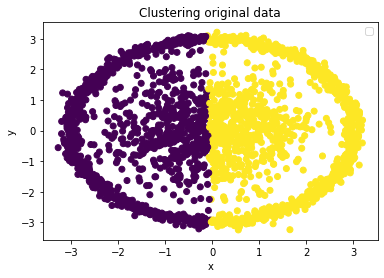

In [45]:
#Apply K-means with K=2 to the original dataset and plot the result
#each cluster plotted with a different color
model = KMeans(n_clusters=K_MEANS_K)
model.fit(dataset.data)
plt.scatter(dataset.data[:, 0], dataset.data[:, 1], c=model.labels_)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Clustering original data")
plt.show()

No handles with labels found to put in legend.


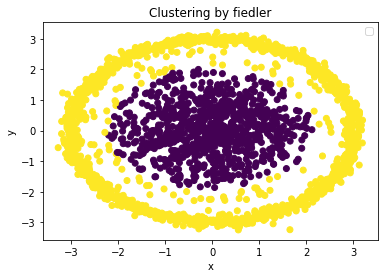

In [46]:
# Plot the clustering result according to the Fiedler vector
#fiedler = dmValues[:, -2]
fiedlerClustering = np.fromiter(
    map(lambda x: 1 if x >= 0 else 0, fiedlerVector), dtype=np.int)
plt.scatter(dataset.data[:, 0], dataset.data[:, 1], c=fiedlerClustering)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Clustering by fiedler")
plt.show()

### We see feidler vector cluster the data much better for the 2 clusters the the regular k-means

# Question #4

In [50]:
#Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score

In [51]:
#function to Normalize each row of R to have norm()=1
def norm(mat, d):
    for i in range(len(mat)):
        mat[i] = mat[i]/np.linalg.norm(mat[i])
    return mat

In [52]:
##Load the dataset named Arcene data and its associated labels Arcene label.
data = pd.read_csv('arcene_train.data', sep=" ", header=None)
label = pd.read_csv('arcene_train.labels', sep=" ", header=None)
label = label.values
data = data.drop(data.columns[10000], axis=1)
D = data.shape[1]

In [ ]:
d_list = [1, 10, 100, 200, 500, 600, 700, 800, 900, 1000]
result = {}
for d in d_list:
    print(f"d={d}:")
    # d=900
    #create the random projection matrix
    P = np.random.randn(D, d)
    ##function to Normalize each row of R to have norm()=1
    P = norm(P, d)
    #Project the data to the reduced space
    pro = data@P
    projectedData = pro.values
    #dist = numpy.linalg.norm(a-b)
    #Pick two points, # 22 and point num. 43 and compute the Euclidean distance 
    #between them in the original space and in the reduced space.
    data_val = data.values
    old_row_22 = data_val[21, :]
    old_row_43 = data_val[42, :]
    old_dist = np.linalg.norm(old_row_22-old_row_43)
    print('dist betwenn 22 to 43 is:', old_dist)

    new_row_22 = projectedData[21, :]
    new_row_43 = projectedData[42, :]
    new_dist = np.linalg.norm(new_row_22-new_row_43)

    print('new dist between 22 to 43 is:', new_dist)
    print('ratio between original and new is:', old_dist/new_dist)
    
    #a 10-fold cross validation to split the original data, the projected data and the label into a 90-10 split at each fold.
    kf = KFold(n_splits=10, shuffle=True)
    label
    accuracy_list_original = []
    accuracy_list_new = []
    splits = kf.split(data)
    for train_index, test_index in splits:
        # Split train-test
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = label[train_index], label[test_index]
        clf = svm.SVC(C=2)
        y_train = np.reshape(y_train, (len(y_train),))
        y_test = np.reshape(y_test, (len(y_test),))
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(pred, y_test)
        accuracy_list_original.append(accuracy)

    label
    accuracy_list_new = []
    splits = kf.split(pro)
    for train_index, test_index in splits:
        # Split train-test
        X_train, X_test = pro.iloc[train_index], pro.iloc[test_index]
        y_train, y_test = label[train_index], label[test_index]
        clf = svm.SVC(C=2)
        y_train = np.reshape(y_train, (len(y_train),))
        y_test = np.reshape(y_test, (len(y_test),))
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(pred, y_test)
        accuracy_list_new.append(accuracy)

    print('mean correct classification rate for the original data',
          np.mean(accuracy_list_original))
    print('mean correct classification rate for the reduced data',
          np.mean(accuracy_list_new))
    result[d] = [np.mean(accuracy_list_original), np.mean(accuracy_list_new)]


d=1:
dist betwenn 22 to 43 is: 12731.141032916099
new dist between 22 to 43 is: 12320.0
ratio between original and new is: 1.0333718370873457
mean correct classification rate for the original data 0.75
mean correct classification rate for the reduced data 0.53
d=10:
dist betwenn 22 to 43 is: 12731.141032916099
new dist between 22 to 43 is: 8708.724763197217
ratio between original and new is: 1.4618834994897854
mean correct classification rate for the original data 0.74
mean correct classification rate for the reduced data 0.6900000000000001
d=100:
dist betwenn 22 to 43 is: 12731.141032916099
new dist between 22 to 43 is: 11429.066084192693
ratio between original and new is: 1.1139266269992332
mean correct classification rate for the original data 0.7699999999999999
mean correct classification rate for the reduced data 0.73
d=200:
dist betwenn 22 to 43 is: 12731.141032916099
new dist between 22 to 43 is: 12788.086128989415
ratio between original and new is: 0.9955470196635424
mean corre

In [8]:
print('results as function of d', result)

results as function of d {1: [0.8, 0.5], 10: [0.8, 0.6900000000000002], 100: [0.78, 0.66], 200: [0.77, 0.76], 500: [0.78, 0.76], 600: [0.7700000000000001, 0.75], 700: [0.78, 0.76], 800: [0.76, 0.76], 900: [0.76, 0.74], 1000: [0.76, 0.7]}


In [ ]:
In most of the runs the best results were for d=~600-700

# Question #1 - Theoretical

In [48]:
from IPython.display import IFrame
IFrame("./mul_dim_analysis_question1.pdf", width=600, height=300)